In [ ]:
# Download and unzip the dataset
# NOTE: the ! means that we're sending the command directly to the console,
# as opposed to running the command as a piece of Python code.
!wget https://archive.ics.uci.edu/static/public/53/iris.zip
!unzip iris.zip

--2024-06-18 17:34:44--  https://archive.ics.uci.edu/static/public/53/iris.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘iris.zip’

iris.zip                [ <=>                ]   3.65K  --.-KB/s    in 0s      

2024-06-18 17:34:44 (625 MB/s) - ‘iris.zip’ saved [3738]

Archive:  iris.zip
  inflating: Index                   
  inflating: bezdekIris.data         
  inflating: iris.data               
  inflating: iris.names              


In [ ]:
# Import relevant libraries: pandas, statistical analysis, and
# plotting
import pandas as pd
from statistics import pstdev, mean
import matplotlib.pyplot as plt # BONUS

In [ ]:
opened_dataset = open("/content/iris.data", "r")
iris_lines = opened_dataset.readlines()
opened_dataset.close()
print(iris_lines)

['5.1,3.5,1.4,0.2,Iris-setosa\n', '4.9,3.0,1.4,0.2,Iris-setosa\n', '4.7,3.2,1.3,0.2,Iris-setosa\n', '4.6,3.1,1.5,0.2,Iris-setosa\n', '5.0,3.6,1.4,0.2,Iris-setosa\n', '5.4,3.9,1.7,0.4,Iris-setosa\n', '4.6,3.4,1.4,0.3,Iris-setosa\n', '5.0,3.4,1.5,0.2,Iris-setosa\n', '4.4,2.9,1.4,0.2,Iris-setosa\n', '4.9,3.1,1.5,0.1,Iris-setosa\n', '5.4,3.7,1.5,0.2,Iris-setosa\n', '4.8,3.4,1.6,0.2,Iris-setosa\n', '4.8,3.0,1.4,0.1,Iris-setosa\n', '4.3,3.0,1.1,0.1,Iris-setosa\n', '5.8,4.0,1.2,0.2,Iris-setosa\n', '5.7,4.4,1.5,0.4,Iris-setosa\n', '5.4,3.9,1.3,0.4,Iris-setosa\n', '5.1,3.5,1.4,0.3,Iris-setosa\n', '5.7,3.8,1.7,0.3,Iris-setosa\n', '5.1,3.8,1.5,0.3,Iris-setosa\n', '5.4,3.4,1.7,0.2,Iris-setosa\n', '5.1,3.7,1.5,0.4,Iris-setosa\n', '4.6,3.6,1.0,0.2,Iris-setosa\n', '5.1,3.3,1.7,0.5,Iris-setosa\n', '4.8,3.4,1.9,0.2,Iris-setosa\n', '5.0,3.0,1.6,0.2,Iris-setosa\n', '5.0,3.4,1.6,0.4,Iris-setosa\n', '5.2,3.5,1.5,0.2,Iris-setosa\n', '5.2,3.4,1.4,0.2,Iris-setosa\n', '4.7,3.2,1.6,0.2,Iris-setosa\n', '4.8,3.1,

In [ ]:
# Remove the last empty line/clean dataset
iris_lines.pop(-1)

'\n'

In [ ]:
split_lines = [line.split(',') for line in iris_lines]

iris_df = pd.DataFrame(split_lines, columns = ["sepal length", "sepal width", "petal length", "petal width", "class"])
iris_df = iris_df.apply(pd.to_numeric, errors = "ignore")

In [ ]:
print(iris_df)

     sepal length  sepal width  petal length  petal width             class
0             5.1          3.5           1.4          0.2     Iris-setosa\n
1             4.9          3.0           1.4          0.2     Iris-setosa\n
2             4.7          3.2           1.3          0.2     Iris-setosa\n
3             4.6          3.1           1.5          0.2     Iris-setosa\n
4             5.0          3.6           1.4          0.2     Iris-setosa\n
..            ...          ...           ...          ...               ...
145           6.7          3.0           5.2          2.3  Iris-virginica\n
146           6.3          2.5           5.0          1.9  Iris-virginica\n
147           6.5          3.0           5.2          2.0  Iris-virginica\n
148           6.2          3.4           5.4          2.3  Iris-virginica\n
149           5.9          3.0           5.1          1.8  Iris-virginica\n

[150 rows x 5 columns]


In [ ]:
iris_df = pd.read_csv('/content/iris.data', header = None, names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])
print(iris_df)

     sepal length  sepal width  petal length  petal width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [ ]:
iris_df.dropna(inplace = True)

In [ ]:
features = iris_df.iloc[:, :4]
print(features)

     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [ ]:
standard_dev = [pstdev(features[col]) for col in features]

print(standard_dev)

[0.8253012917851409, 0.4321465800705435, 1.7585291834055212, 0.7606126185881718]


In [ ]:
max_values = [max(features[col]) for col in features]
scaled_values = features.div(max_values)
print(scaled_values)

     sepal length  sepal width  petal length  petal width
0        0.645570     0.795455      0.202899         0.08
1        0.620253     0.681818      0.202899         0.08
2        0.594937     0.727273      0.188406         0.08
3        0.582278     0.704545      0.217391         0.08
4        0.632911     0.818182      0.202899         0.08
..            ...          ...           ...          ...
145      0.848101     0.681818      0.753623         0.92
146      0.797468     0.568182      0.724638         0.76
147      0.822785     0.681818      0.753623         0.80
148      0.784810     0.772727      0.782609         0.92
149      0.746835     0.681818      0.739130         0.72

[150 rows x 4 columns]


In [ ]:
stdev_strings = []

for stdev in standard_dev:
  stdev_strings.append(str(stdev))

big_stdev_string = ",".join(stdev_strings)

stdev_file = open("stdev.txt", "w")
stdev_file.write(big_stdev_string)
stdev_file.close()

In [ ]:
feature_strings = []

for row in scaled_values.itertuples():
  feature_string = str(row[1:])
  feature_strings.append(feature_string[1:-1])

big_feature_string = "\n".join(feature_strings)

feature_text = open("/content/features.txt", "w")
feature_text.write(big_feature_string)
feature_text.close()

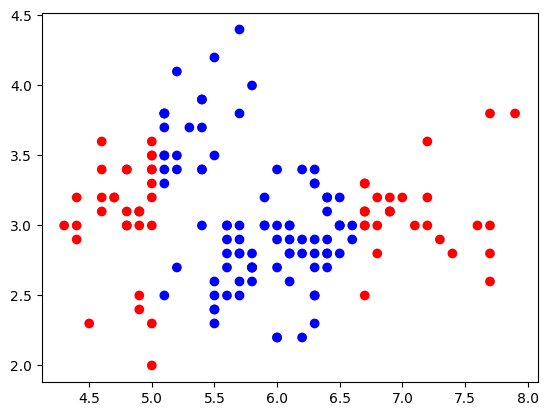

In [ ]:
import matplotlib.pyplot as plt # BONUS
mean_sepal_length = mean(features["sepal length"])
std_sepal_length = pstdev(features["sepal length"])

colors = []

for feature in features["sepal length"]:
  if abs(feature - mean_sepal_length) > std_sepal_length:
    colors.append('red')
  else:
    colors.append('blue')

plt.scatter(features["sepal length"], features["sepal width"], c = colors)
# plt.xlabel("Sepal Length")
# plt.ylabel("Sepal Width")
# plt.title("Sepal Length vs. Sepal Width")
plt.show()

In [ ]:
S